In [92]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
#displayable rows
pd.options.display.max_rows=4000
pd.options.display.max_columns =1000

In [95]:
cd=pd.read_excel(r"D:\yash\Relevel NOTES\Python\case study -2\columns_description.xlsx",sheet_name="columns_description",skiprows=1)

In [96]:
plt.rcParams["figure.figsize"]=(10,5)

In [97]:
plt.style.use("ggplot")

### 1.Data Wrangling - Loading the Dataset

In [98]:
ad=pd.read_csv(r"D:\yash\Relevel NOTES\Python\case study -2\application_data.csv")

In [99]:
ad.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### i.Inspecting data - Checking the shape of data 

In [100]:
ad.shape

(307511, 122)

#### ii .Summary - Focus on Range mean , median  of each variable
#### To check Invalid -ve values

In [101]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### iii. Getting % nulls

In [102]:
null_cols=ad.isnull().sum().sort_values(ascending=False)

In [103]:
len(ad) ,ad.shape[0]

(307511, 307511)

In [104]:
perc_null_cols =null_cols*100/len(ad)
perc_null_cols

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### 2.Data Cleaning
#### i.Find columns with percentage of null values > 45 %

In [105]:
perc_null_cols

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [106]:
perc_null_cols.values

array([6.98722973e+01, 6.98722973e+01, 6.98722973e+01, 6.94329634e+01,
       6.94329634e+01, 6.94329634e+01, 6.83861716e+01, 6.83549532e+01,
       6.83549532e+01, 6.83549532e+01, 6.78486298e+01, 6.78486298e+01,
       6.78486298e+01, 6.64977838e+01, 6.64977838e+01, 6.64977838e+01,
       6.59908101e+01, 5.93767377e+01, 5.93767377e+01, 5.93767377e+01,
       5.85159555e+01, 5.85159555e+01, 5.85159555e+01, 5.63810725e+01,
       5.51791643e+01, 5.51791643e+01, 5.51791643e+01, 5.32959797e+01,
       5.32959797e+01, 5.32959797e+01, 5.08407829e+01, 5.07497293e+01,
       5.07497293e+01, 5.07497293e+01, 5.03487680e+01, 5.03487680e+01,
       5.03487680e+01, 5.01933264e+01, 5.01933264e+01, 5.01933264e+01,
       5.01760913e+01, 4.97608216e+01, 4.97608216e+01, 4.97608216e+01,
       4.87810192e+01, 4.87810192e+01, 4.87810192e+01, 4.82685172e+01,
       4.73983045e+01, 3.13455454e+01, 1.98253071e+01, 1.35016308e+01,
       1.35016308e+01, 1.35016308e+01, 1.35016308e+01, 1.35016308e+01,
      

In [107]:
perc_null_cols.values > (45)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [108]:
remove_cols= perc_null_cols[perc_null_cols.values > (45)]
remove_cols

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [109]:
len(remove_cols)

49

#### There are 49 columns with greater than 45% null values

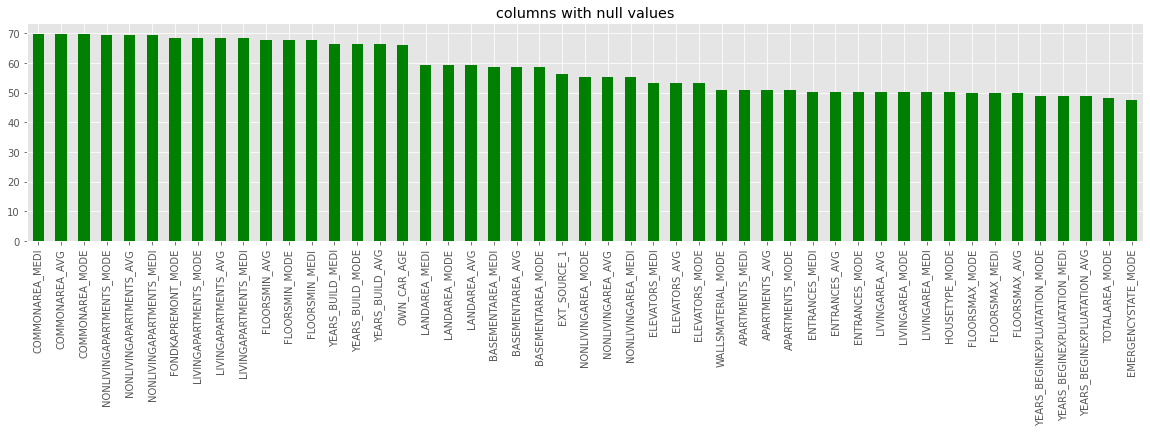

In [110]:
plt.figure(figsize=(20,4))
remove_cols.plot(kind ="bar",color="green")
plt.title("columns with null values")
plt.show()

#### ii.Remove all columns with null values > 45%

In [111]:
perc_null=(ad.isnull().sum().sort_values(ascending = False)/len(ad))*100

In [112]:
remove_cols=list(perc_null[perc_null>=45].index)

In [113]:
ad.drop(remove_cols,axis=1,inplace=True)

In [114]:
ad.shape

(307511, 73)

In [115]:
# check remaining columns
ad.isnull().sum().sort_values(ascending=False)*100/len(ad)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

#### iii.Imputing missing Data--> Fill Remaining Columns Missing values 
#### 1.Numerical Columns

#### a.Checking These columns as there all focused on AMT_REQ_CREDIT
##### AMT_REQ_CREDIT_BUREAU_YEAR     
##### AMT_REQ_CREDIT_BUREAU_QRT      
##### AMT_REQ_CREDIT_BUREAU_MON      
##### AMT_REQ_CREDIT_BUREAU_WEEK     
##### AMT_REQ_CREDIT_BUREAU_DAY      
##### AMT_REQ_CREDIT_BUREAU_HOUR     

In [116]:
ad["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [117]:
ad["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

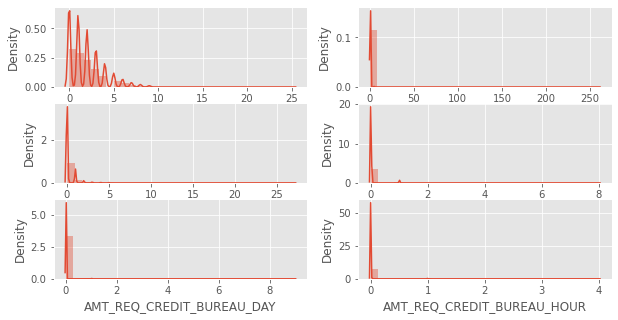

In [118]:
plt.subplot(3,2,1)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_YEAR"],bins=30)
plt.subplot(3,2,2)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_QRT"],bins=30)
plt.subplot(3,2,3)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_MON"],bins=30)
plt.subplot(3,2,4)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_WEEK"],bins=30)
plt.subplot(3,2,5)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_DAY"],bins=30)
plt.subplot(3,2,6)
sns.distplot(ad["AMT_REQ_CREDIT_BUREAU_HOUR"],bins=30)
plt.show()

As these numerical columns are not continuos(Contains onlyinteger) we can fill the missing values by mode
TOP 2 value counts have a large difference with mode so fill by mode

In [119]:
l=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", 
   "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]
for i in l:
    ad[i]=ad[i].fillna(ad[i].mode()[0])

In [120]:
#Check null columns now
ad.isnull().sum().sort_values(ascending=False)*100/len(ad)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_B

#### B.AMT_ANNUITY

In [121]:
ad.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

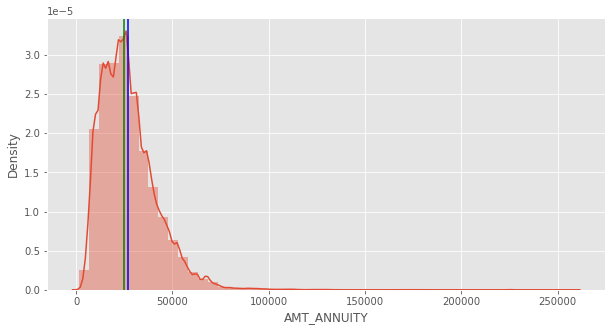

In [122]:
sns.distplot(ad["AMT_ANNUITY"])
plt.axvline(ad["AMT_ANNUITY"].mean(),color="blue")
plt.axvline(ad["AMT_ANNUITY"].median(),color="Green")
plt.show()

In [123]:
ad["AMT_ANNUITY"].skew()

1.5797773638612507

In [124]:
ad["AMT_ANNUITY"].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
#### Because we see a huge skewness, we will fill the missing value by median.
Since AMT_ANNUITY is a continuous variable, unlike AMT_REQ_CREDIT_BUREAU_YEAR etc ( which could take only integer values), it is better to impute this with the median value.

Another reason for chosing to go for Median instead of Mode is close value counts for top 2 values as we'll see below.

In [125]:
ad["AMT_ANNUITY"]=ad["AMT_ANNUITY"].fillna(ad["AMT_ANNUITY"].median())

In [126]:
ad["AMT_ANNUITY"].isna().sum()

0

#### C.AMT_GOODS_PRICE

In [127]:
ad["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

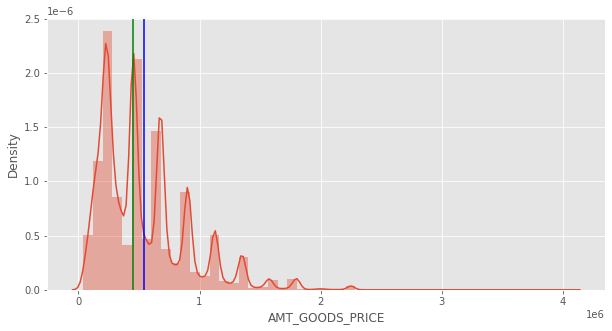

In [128]:
sns.distplot(ad["AMT_GOODS_PRICE"])
plt.axvline(ad["AMT_GOODS_PRICE"].median(),color="green")
plt.axvline(ad["AMT_GOODS_PRICE"].mean(),color="blue")
plt.show()

In [129]:
ad["AMT_GOODS_PRICE"].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [130]:
ad["AMT_GOODS_PRICE"].skew()

1.3490003414747445

Similar to AMT_ANNUITY, imputing NULLs with Median for AMT_GOODS_PRICE for similar reasons.

In [131]:
ad["AMT_GOODS_PRICE"]=ad["AMT_GOODS_PRICE"].fillna(ad["AMT_GOODS_PRICE"].median())

In [132]:
ad["AMT_GOODS_PRICE"].isna().sum()

0

###  iv.Fixing erroneous data
As seen already with the help of describe function, we know that we need to treat -ve values in days columns.

In [133]:
print(ad["DAYS_BIRTH"].unique())
print(ad["DAYS_EMPLOYED"].unique())
print(ad["DAYS_REGISTRATION"].unique())
print(ad["DAYS_ID_PUBLISH"].unique())
print(ad["DAYS_LAST_PHONE_CHANGE"].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [134]:
#Creating list of negtive elements columns
erroneous_cols = [i for i in ad if i.startswith("DAYS")]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [135]:
ad[erroneous_cols]=abs(ad[erroneous_cols])

In [136]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.0000

#### 2.Categorical Columns

#### 1.CODE_GENDER

In [137]:
ad.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [138]:
#Replace XNA with Mode
ad.CODE_GENDER=ad.CODE_GENDER.replace("XNA","F")

In [139]:
ad.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### 2.ORGANIZATION_TYPE

In [140]:
ad["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

XNAs for ORGANIZATION_TYPE have 2nd highest count in the data. We must be very careful in imputing such a high number of XNAs with any value.

Since it is a categorical variable, and there won't be any aggregrate functions performed on this data, we don't necessarily need whole of the value to be imputed.

Thus, changing all XNAs with NULLs to protect the originality of data.

In [141]:
ad["ORGANIZATION_TYPE"]=ad["ORGANIZATION_TYPE"].replace("XNA",np.NaN)  # can use np.NaN or 0 

In [142]:
ad["ORGANIZATION_TYPE"]

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307506                  Services
307507                       NaN
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 307511, dtype: object

In [143]:
ad["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### 3. Adding new columns by Binning Continuous Variables
It is always a good practice to identify core or highly significant continuous fields in the data and then bin them into specific categories. It allows for an additional categorical analysis for such fields. We'll observe the use case of same later in this EDA exercise. For now, let's bin some of the continuous variables into 5 bins each as below -

#### a.Binning AMT_INCOME_TOTAL

In [144]:
#1. use describe to see what is the range or spread of income
ad.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [145]:
# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories
ad["AMT_INCOME_RANGE"]=pd.qcut(ad.AMT_INCOME_TOTAL,q=[0,0.2,0.5,0.8,0.95,1],
                              labels=["VERY_LOW","LOW","MEDIUM","HIGH","VERY_HIGH"])

In [146]:
ad["AMT_INCOME_RANGE"].value_counts()

MEDIUM       106633
LOW           90089
VERY_LOW      63671
HIGH          33083
VERY_HIGH     14035
Name: AMT_INCOME_RANGE, dtype: int64

#### b.Binning AMT_CREDIT

In [147]:
ad["AMT_CREDIT_RANGE"]=pd.qcut(ad["AMT_CREDIT"],q=[0,0.2,0.5,0.8,0.95,1],
                               labels=["VERY_LOW","LOW","MEDIUM","HIGH","VERY_HIGH"])

In [148]:
ad["AMT_CREDIT_RANGE"].value_counts()

MEDIUM       94750
LOW          88924
VERY_LOW     64925
HIGH         44878
VERY_HIGH    14034
Name: AMT_CREDIT_RANGE, dtype: int64

#### c.Binning DAYS_BIRTH

In [149]:
ad["DAYS_BIRTH"]

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [150]:
ad["DAYS_BIRTH"]=(ad["DAYS_BIRTH"]/365).astype("int")

In [151]:
ad["DAYS_BIRTH"]

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

In [152]:
ad["DAYS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [153]:
# Used pd.cut to give bins of ages
ad["DAYS_BIRTH_BINS"]=pd.cut(ad["DAYS_BIRTH"],bins=[19,25,35,60,100],
                              labels=["VERY_YOUNG","YOUNG","MIDDLE_AGE","SENIOR_CITIZEN"])

In [154]:
ad["DAYS_BIRTH_BINS"].value_counts()

MIDDLE_AGE        185900
YOUNG              75925
SENIOR_CITIZEN     29368
VERY_YOUNG         16318
Name: DAYS_BIRTH_BINS, dtype: int64

#### d.Splitting Based on TARGET
Splitting data into 2 subsets based on Target Variable- Defaulter Data and Non-Defaulter Data.

This will help us with the comparison among 2 groups later

In [155]:
ad.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [156]:
# defaulter->1 , non-defaulter->0
(ad.TARGET.value_counts()*100)/len(ad)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [157]:
((ad.TARGET.value_counts()*100)/len(ad))[0]

91.92711805431351

In [158]:
defaulter=ad[ad["TARGET"]==1]
non_defaulter = ad[ad["TARGET"]==0]

In [159]:
print("defaulter_% - " ,round((defaulter.shape[0]*100/len(ad)),2))
print("non_defaulter_% - ",round((non_defaulter.shape[0]*100/len(ad)),2))

defaulter_% -  8.07
non_defaulter_% -  91.93


In [160]:
#or
print("defaulter_% - " ,round(((ad.TARGET.value_counts()*100)/len(ad))[1],2))
print("non_defaulter_% - " ,round(((ad.TARGET.value_counts()*100)/len(ad))[0],2))

defaulter_% -  8.07
non_defaulter_% -  91.93


#### Percentage imbalance

In [161]:

round(defaulter["TARGET"].count()*100/ non_defaulter["TARGET"].count(),2) 

8.78

Medium imbalance

### 4.Univariate Analysis
#### i . Qualitative Variables(Categorical data) 

#### a.Occupation Type

In [162]:
ad["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [163]:
ad["OCCUPATION_TYPE"].value_counts().index

Index(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
       'High skill tech staff', 'Accountants', 'Medicine staff',
       'Security staff', 'Cooking staff', 'Cleaning staff',
       'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff',
       'Secretaries', 'Realty agents', 'HR staff', 'IT staff'],
      dtype='object')

In [164]:
ad["OCCUPATION_TYPE"].value_counts().values

array([55186, 32102, 27570, 21371, 18603, 11380,  9813,  8537,  6721,
        5946,  4653,  2652,  2093,  1348,  1305,   751,   563,   526],
      dtype=int64)

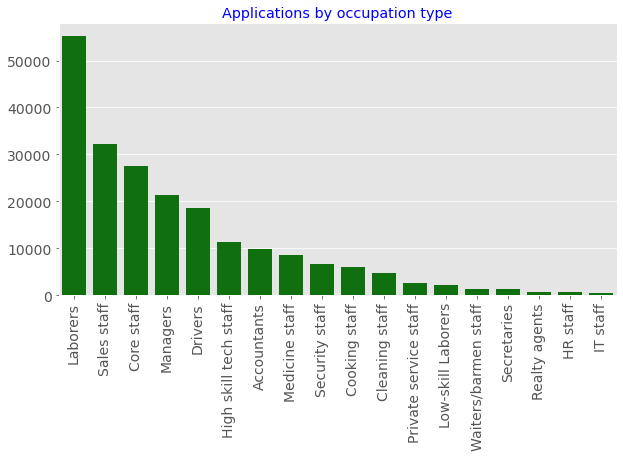

In [165]:
# Distribution of 'OCCUPATION_TYPE'
temp=ad["OCCUPATION_TYPE"].value_counts()
sns.barplot(x=temp.index,y=temp.values,color="green")
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.title("Applications by occupation type", color ="blue")
plt.show()

We can infer that most of the applications come for Labourers, Sales Staff and Core Staff.

#### b.Organization Type

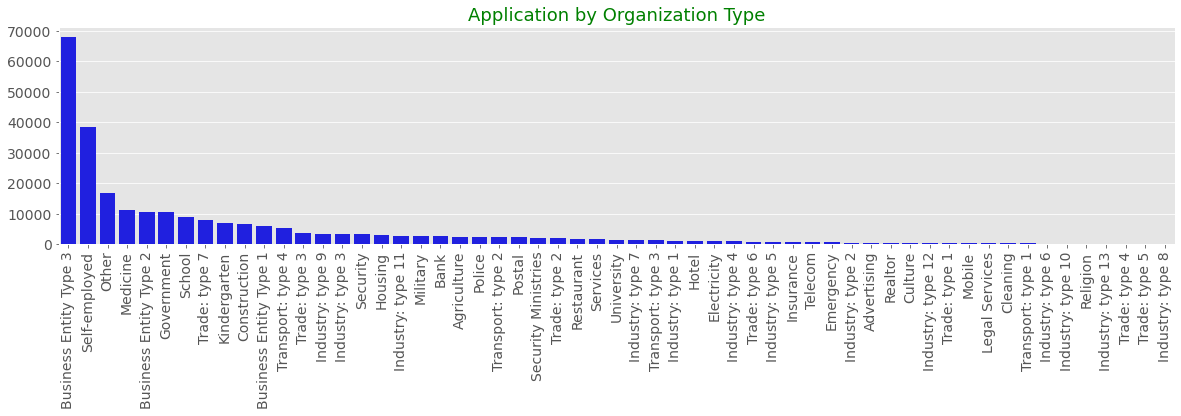

In [166]:
plt.figure(figsize=(20,4))
temp=ad["ORGANIZATION_TYPE"].value_counts()
sns.barplot(x=temp.index,y=temp.values,color="blue")
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.title("Application by Organization Type",size=18,color="green")
plt.show()

It is observed that majority of the applicants belong to Business Entity Type 3 an Self Employed. 

#### c.Comparison of Gender Distribution among Defaulters and Non Defaulters

In [167]:
temp1=non_defaulter.CODE_GENDER.value_counts()
temp2=defaulter.CODE_GENDER.value_counts()
temp1,temp2

(F    188282
 M     94404
 Name: CODE_GENDER, dtype: int64,
 F    14170
 M    10655
 Name: CODE_GENDER, dtype: int64)

In [168]:
ad.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

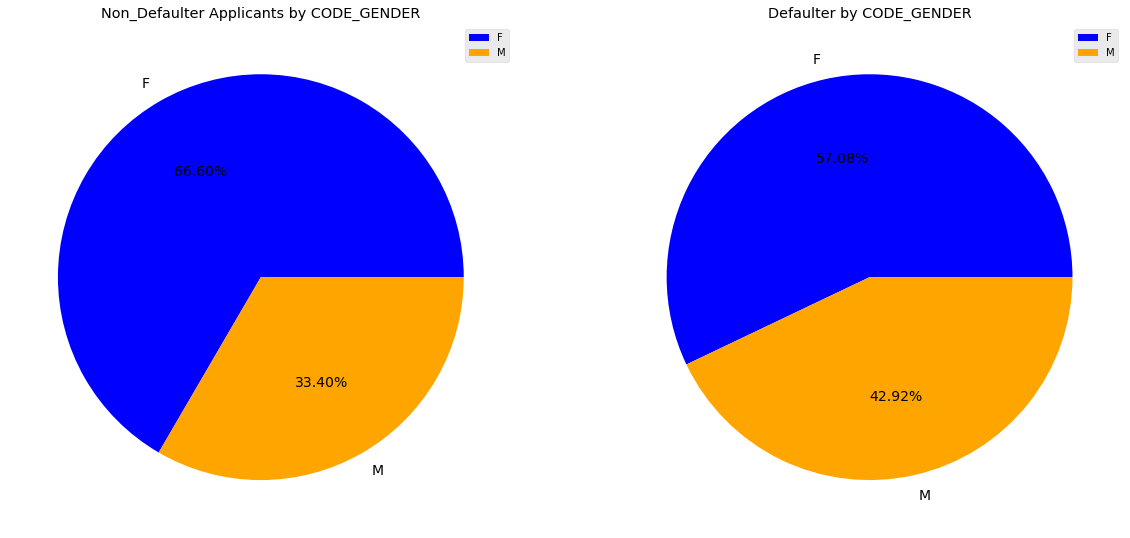

In [169]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.pie(temp1.values,labels=temp1.index,colors=["blue","orange"],autopct="%.2f%%",textprops={'fontsize': 14})
plt.legend()
plt.title("Non_Defaulter Applicants by CODE_GENDER")
plt.subplot(1,2,2)
plt.pie(temp2.values,labels=temp2.index,colors=["blue","orange"],autopct="%.2f%%",textprops={"fontsize":14})
plt.legend()
plt.title("Defaulter by CODE_GENDER")
plt.show()

Insights -

* There is majority of Female loan apllicants
* More Men deafult loans as compared to Women, since the % split has increased further for Men in case of Defaulter distribution.

#### Converting above code into function For Reuse

In [170]:
def Univariate_comparision(ColName):
    
    colors = sns.color_palette('tab10')[0:5] 
    temp1=non_defaulter[ColName].value_counts()
    temp2=defaulter[ColName].value_counts()
    plt.figure(figsize=(20,12))
    plt.subplot(1,2,1)
    plt.pie(temp1.values,labels=temp1.index,colors=colors,autopct="%.2f%%",textprops={'fontsize': 14})
    plt.legend()
    plt.title("Non_Defaulter Applicants by" + str(ColName))
    plt.subplot(1,2,2)
    plt.pie(temp2.values,labels=temp2.index,colors=colors,autopct="%.2f%%",textprops={"fontsize":14})
    plt.legend()
    plt.title("Defaulter by" + str(ColName))
    plt.show()


#### d.Comparison of Income Type Distribution among Defaulters and Non Defaulters

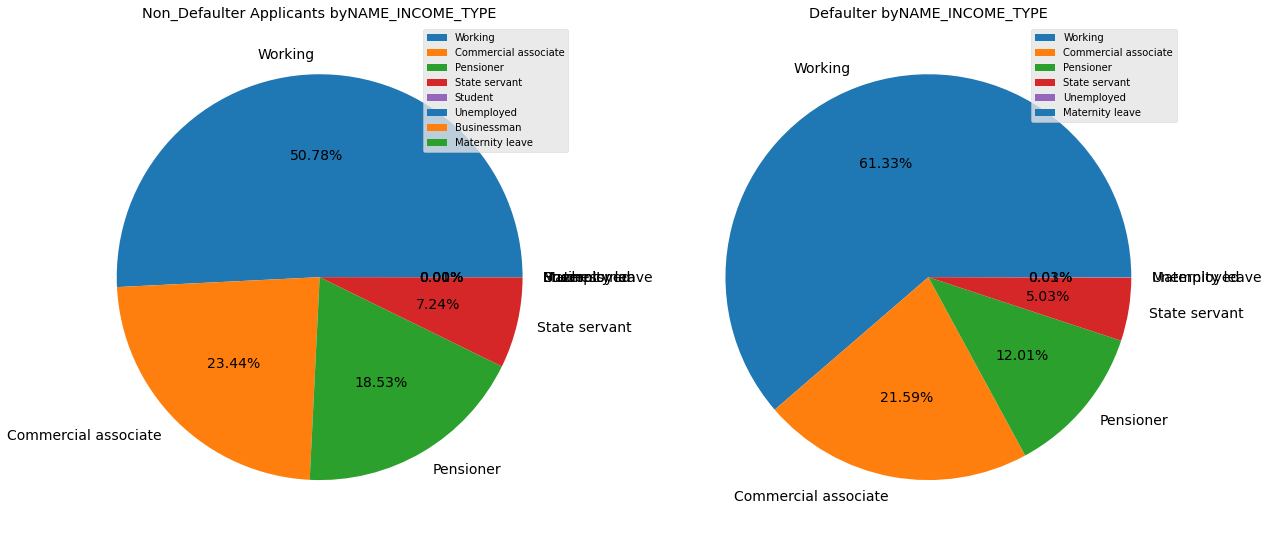

In [171]:
Univariate_comparision('NAME_INCOME_TYPE')

Insights -

* Almost half of the Loan applications come from Working professionals.
* Working professionals contribute more than expected to loan defaults. The % split has increased from 51% to 61%

#### e.Comparison of Family Status Distribution among Defaulters and Non Defaulters

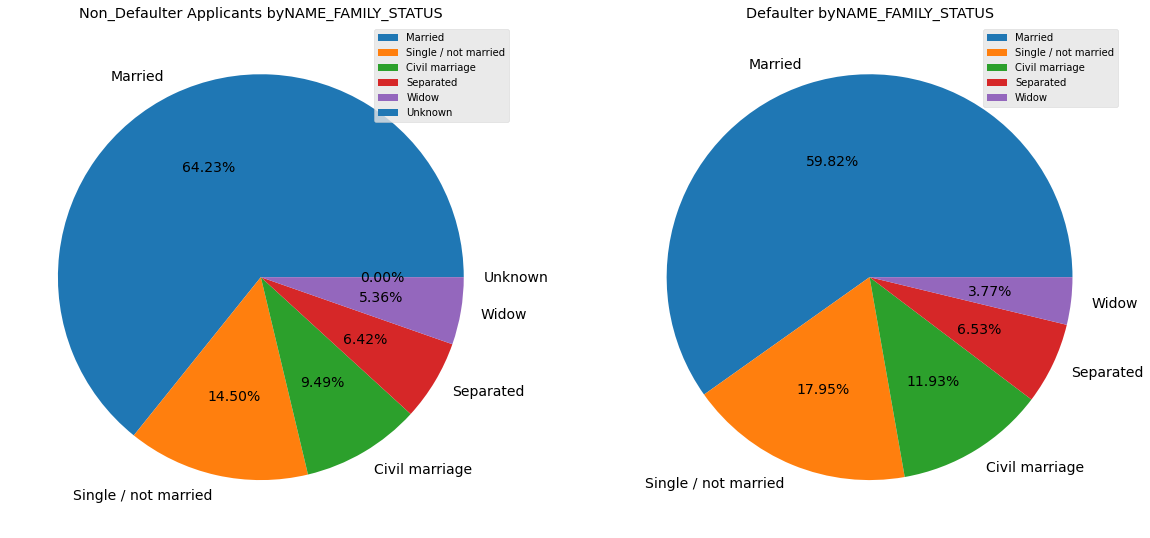

In [172]:
Univariate_comparision("NAME_FAMILY_STATUS")

Insights-
* 65 % of the Loan applicants are married.
* Family status doesn't seem to have any major impact on Loan deafults.

#### f.Comparison of Education Type Distribution among Defaulters and Non Defaulters

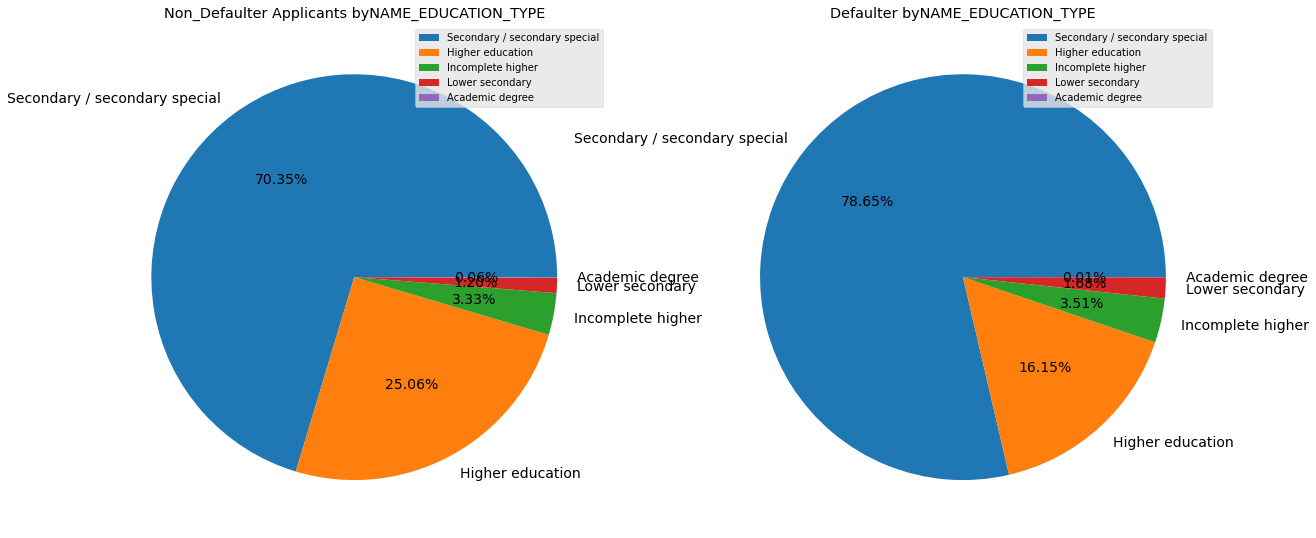

In [173]:
Univariate_comparision("NAME_EDUCATION_TYPE")

Insights-
* More than 2/3rds of Loan applicants have highest education as Secondary. 
* Secondary Education class contribute majorly ( more than expected too) for loan defaults.
* There is a considerable decrease in % split for loan defaults by people with higher education. ( from 25% to 16%)

#### g.Comparison of Housing Type Distribution among Defaulters and Non Defaulters

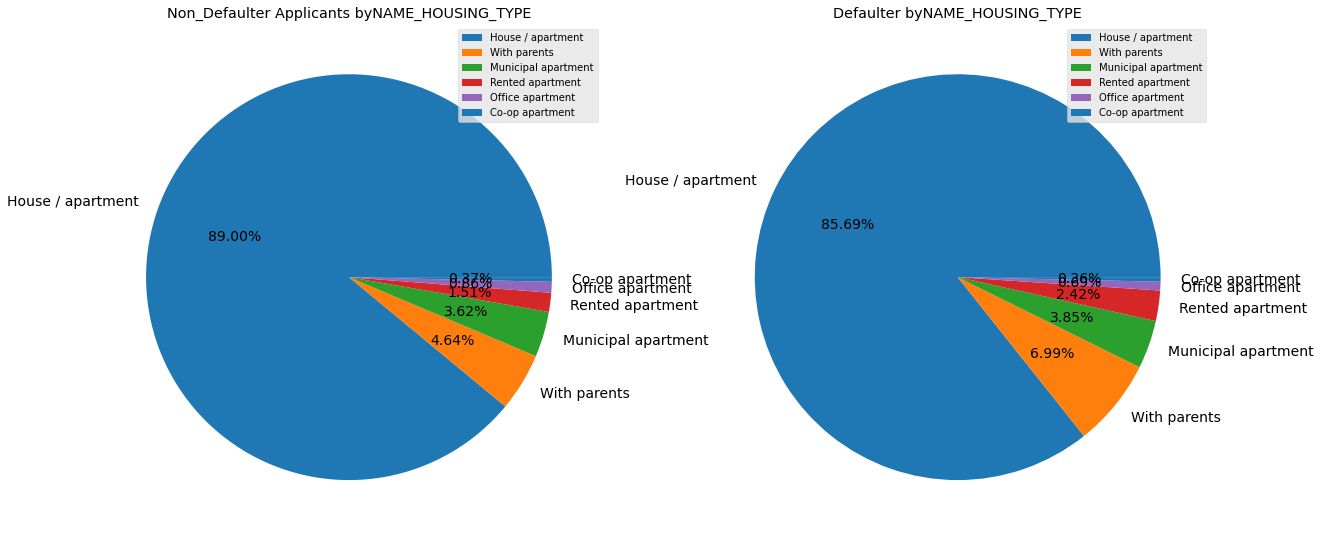

In [174]:
Univariate_comparision("NAME_HOUSING_TYPE")

Insights-
* Almost 90% of Loan applicants have their own home.
* Housing type doesn't play a significant role in determining whether there will be a loan defaulter. 

#### h.Comparison of Income Range Distribution among Defaulters and Non Defaulters

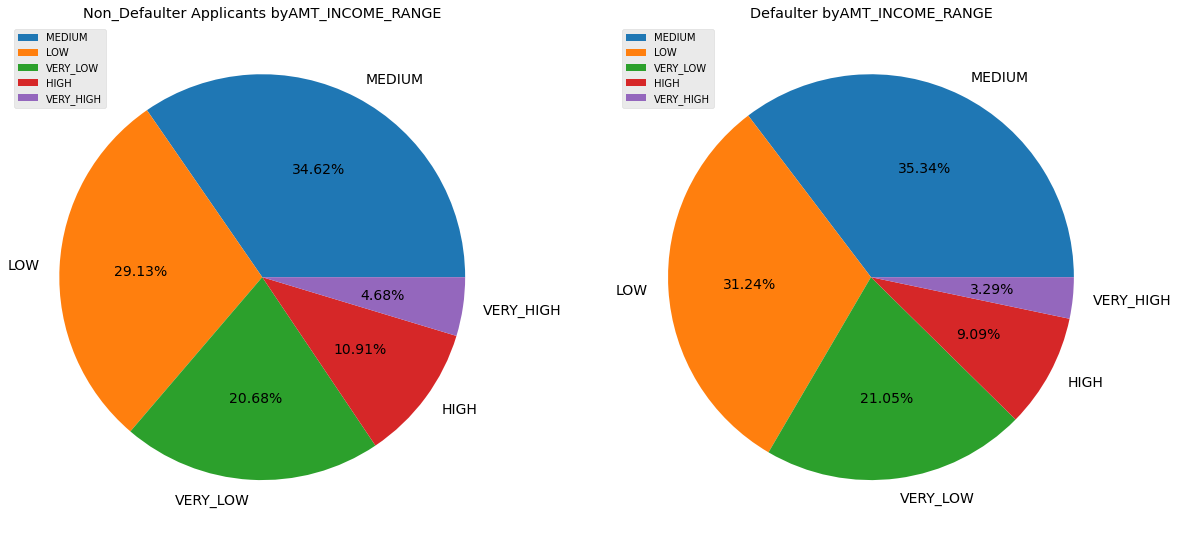

In [175]:
Univariate_comparision("AMT_INCOME_RANGE")

Insights-
* Here also, the % split is more or less unchanged for Defaulters. It suggests that Income doesn't play a significant role in loan defaults.

#### i.Comparison of Age Distribution among Defaulters and Non Defaulters

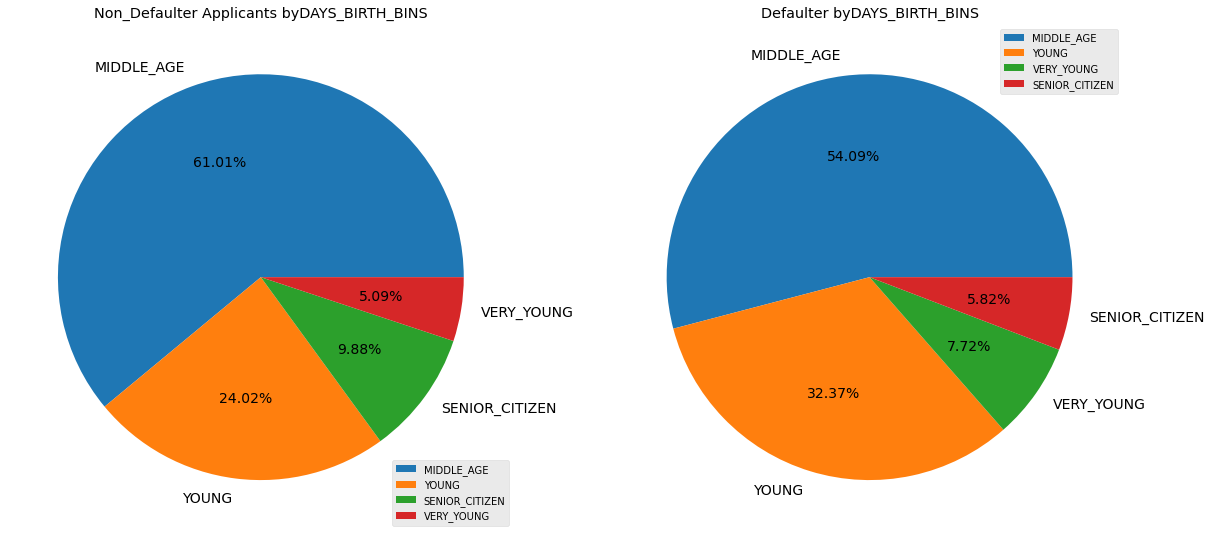

In [176]:
Univariate_comparision("DAYS_BIRTH_BINS")

Insights - 
* There is a significant shift in % split for Middle Age and Young applicants.
* Middle Aged applicants are contributing lesser to loan defaults
* Young applicants are more expected to default on a loan since there is a change in % aplit from 24% to 32%

#### j.Comparison of Loan Type Distribution among Defaulters and Non Defaulters

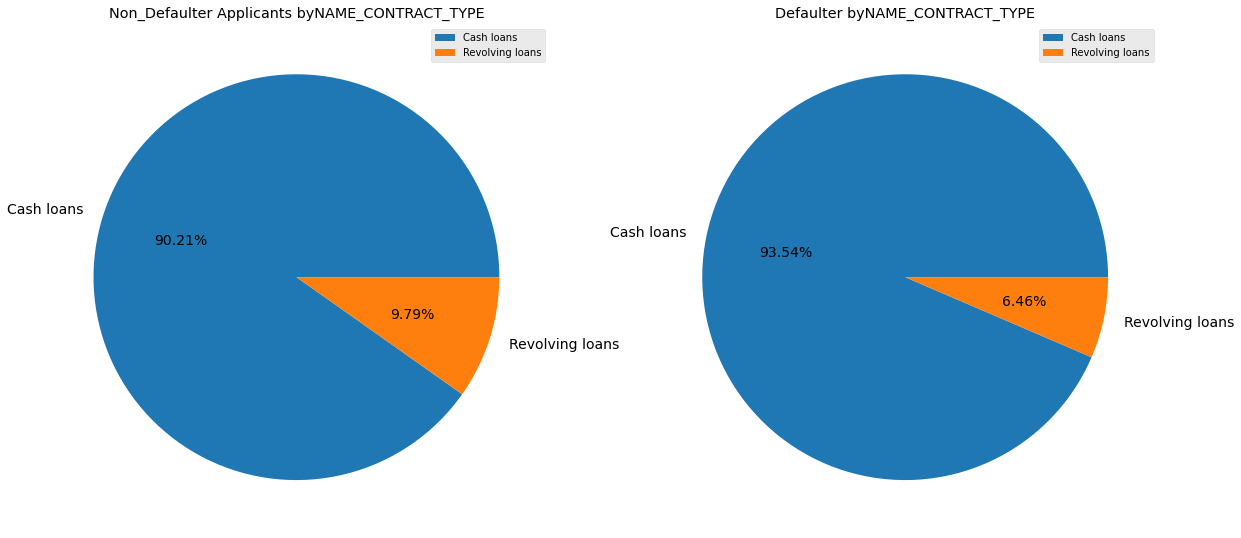

In [177]:
Univariate_comparision("NAME_CONTRACT_TYPE")

Insights-
* Cash loans are slightly more likely to be defaulted than revolving loans. 

#### k.Comparison of Accompany Type Distribution among Defaulters and Non Defaulters

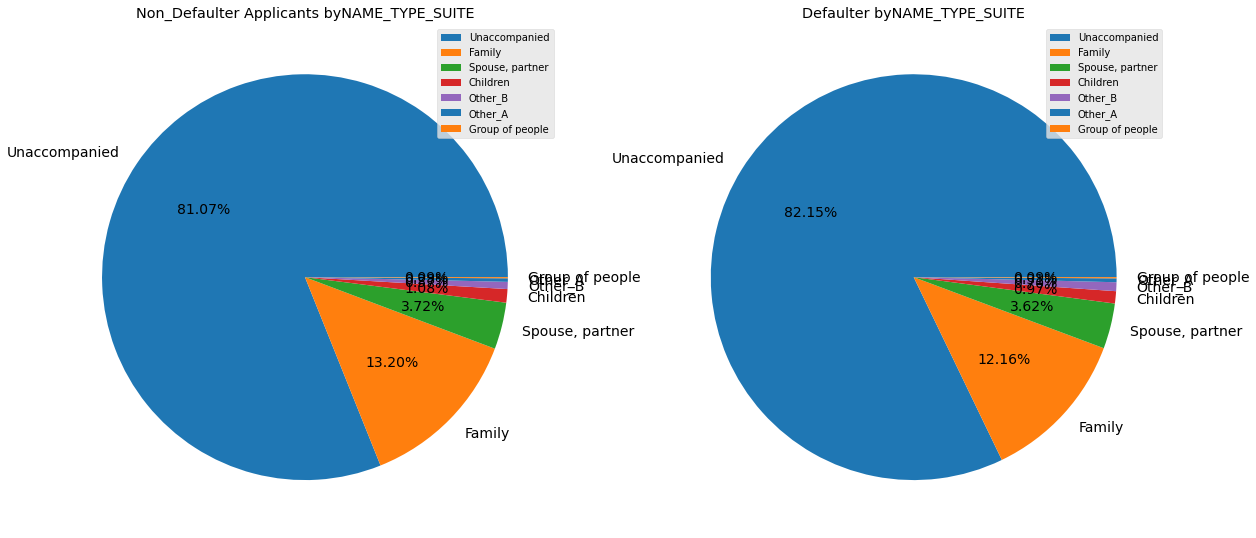

In [178]:
Univariate_comparision("NAME_TYPE_SUITE")

 Insights-
* Majority of loans are applied by single occupants
* This parameter doesn't have any impact on loan defaults as the % split is unchanged in both cases.

#### Univariate Analysis - ii . Quantitative Variables(Numerical data) 

In [179]:
def Univariate_comparision_cat(ColName):
    plt.figure(figsize=(20,12))
    plt.subplot(2,2,1)
    sns.distplot(non_defaulter[ColName],bins=30,color="Green",kde=True)                                                                                         
    plt.title("Non_Defaulter Applicants by" + str(ColName))
    plt.subplot(2,2,2)
    sns.distplot(defaulter[ColName],bins=30,color="Green",kde=True)                                                                                         
    plt.title("Defaulter Applicants by" + str(ColName))
    plt.subplot(2,2,3)
    sns.boxplot(non_defaulter[ColName],orient="h",palette="rainbow")                                                                                         
    plt.title("Non_Defaulter Applicants by" + str(ColName))
    plt.subplot(2,2,4)
    sns.boxplot(defaulter[ColName],orient="h",palette="rainbow")                                                                                          
    plt.title("Defaulter Applicants by" + str(ColName))
    plt.show()

#### a.AMT_ANNUITY 

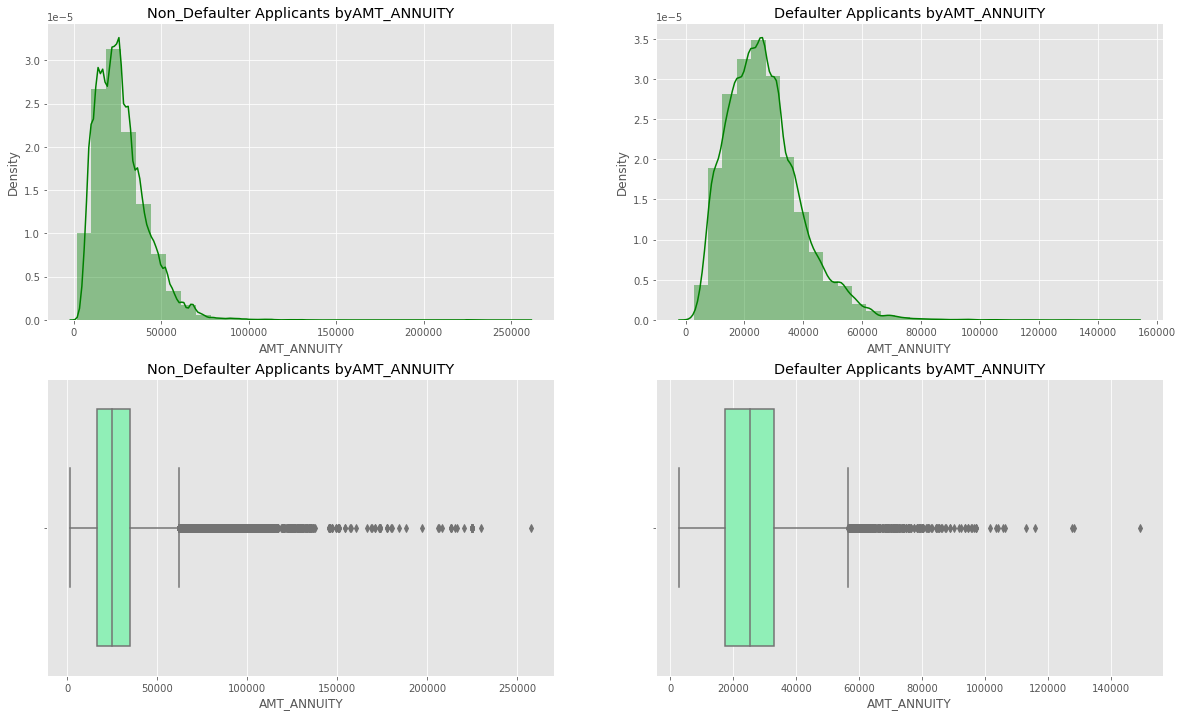

In [180]:
Univariate_comparision_cat("AMT_ANNUITY")

Insights - 
* Applicants with lower Annuity Amount are slightly more likely to default on a loan.
* Majority of Loan applicants come from 1st quartile of Annuity data ( Low salary people )

#### b.AMT_CREDIT

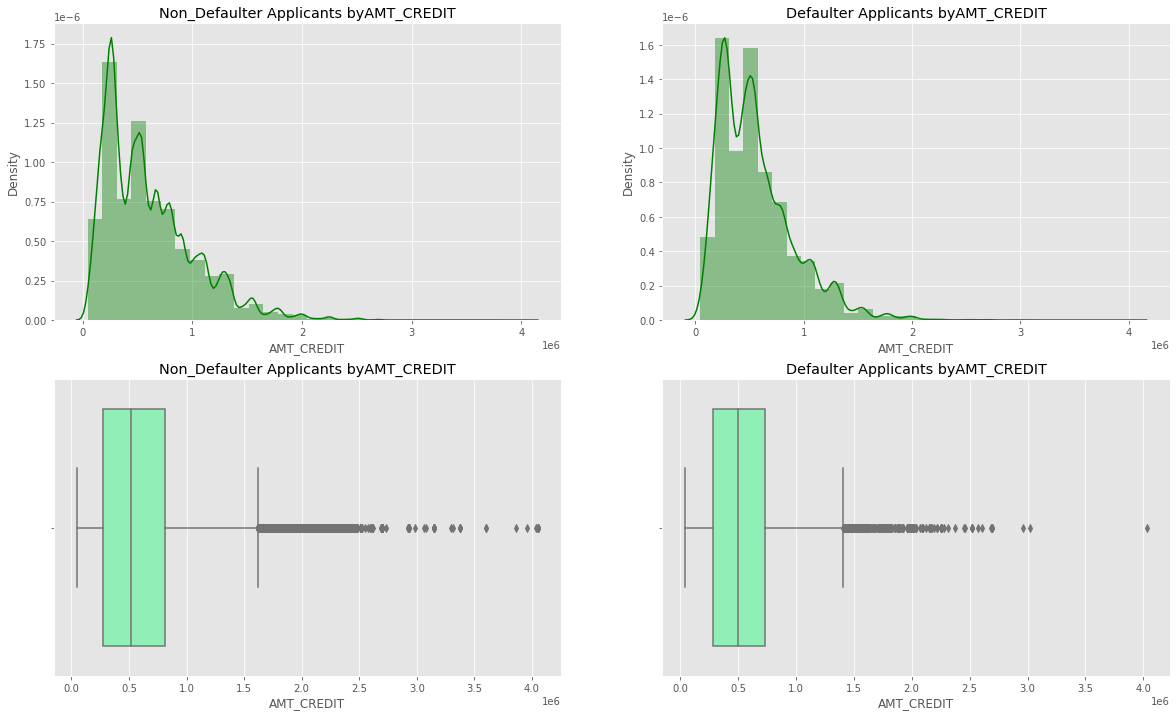

In [181]:
Univariate_comparision_cat("AMT_CREDIT")

Insights-
* Loan Amount doesn't seem to have any correlation with Loan defaults. 

#### 3.AMT_GOODS_PRICE

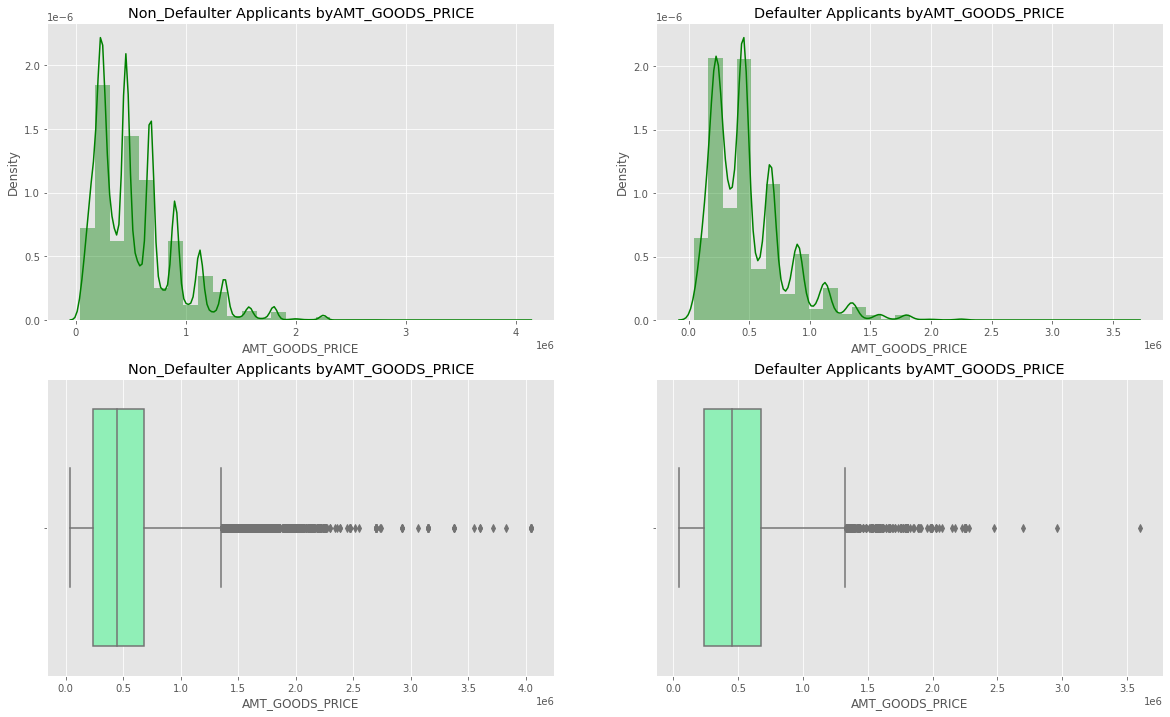

In [182]:
Univariate_comparision_cat("AMT_GOODS_PRICE")

Insights-
* The distribution are almost unchanged for Defaulters and Non Defaulters, hence we can say that Goods Price doesn't impact the chance of a loan default.

### 5. Bivariate & Multivariate Analysis

#### a.Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

In [183]:
def multivariate(col1,col2,col3):
    plt.figure(figsize=(25,12))
    plt.subplot(1,2,1)
    sns.boxplot(x=col1,y=col2,data=non_defaulter,hue=col3,palette="rainbow")
    plt.title("loan amount by AMT_CREDIT and NAME_FAMILY_STATUS(non_defaulter)",size=14)
    plt.subplot(1,2,2)
    sns.boxplot(x=col1,y=col2,data=defaulter,hue=col3,palette="rainbow")
    plt.title("loan amount by AMT_CREDIT and NAME_FAMILY_STATUS(defaulter)",size=14)
    plt.show()

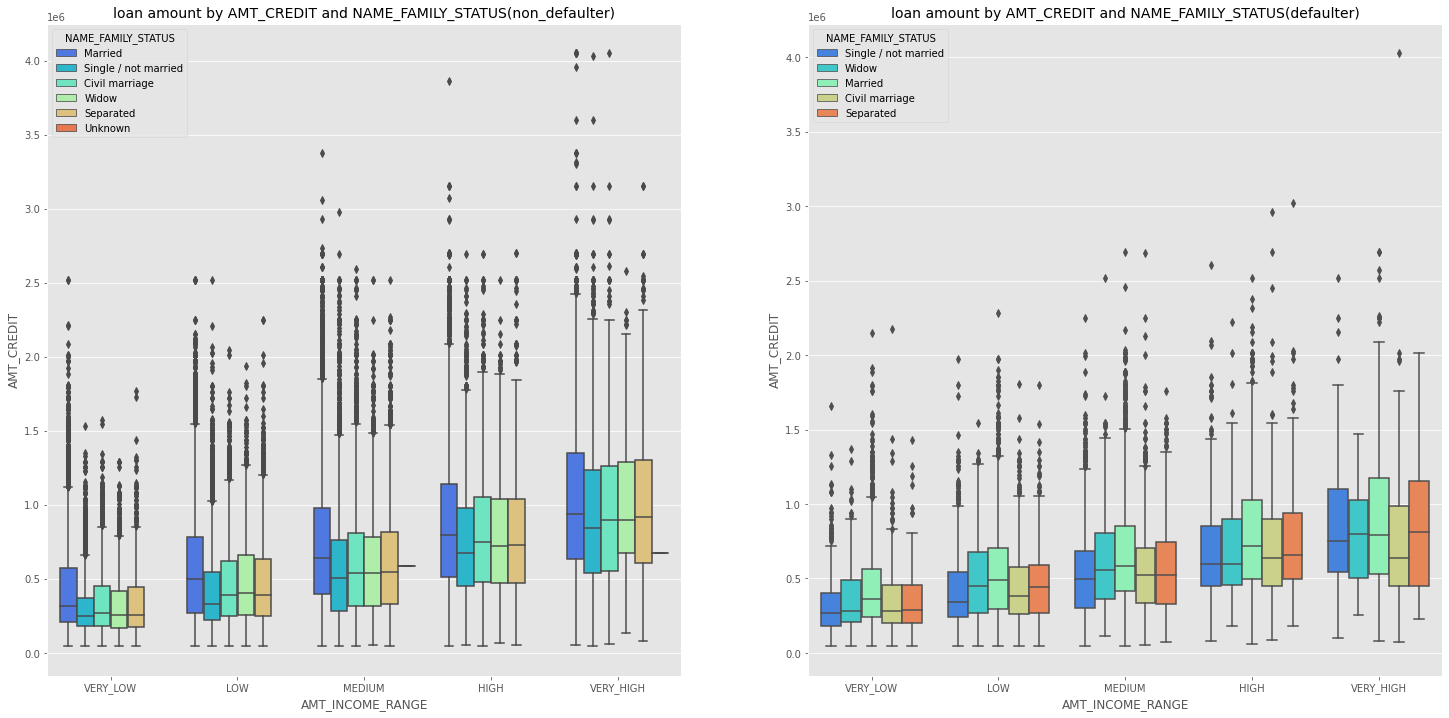

In [184]:
multivariate("AMT_INCOME_RANGE", "AMT_CREDIT","NAME_FAMILY_STATUS")

Insights-
* With increase in Income range, the loan amount increases proportionally.
* On family status axis, we observe that Married applicants have higher loan amount than others.


#### b.Analysis of NAME_EDUCATION_TYPE, AMT_CREDIT & NAME_FAMILY_STATUS

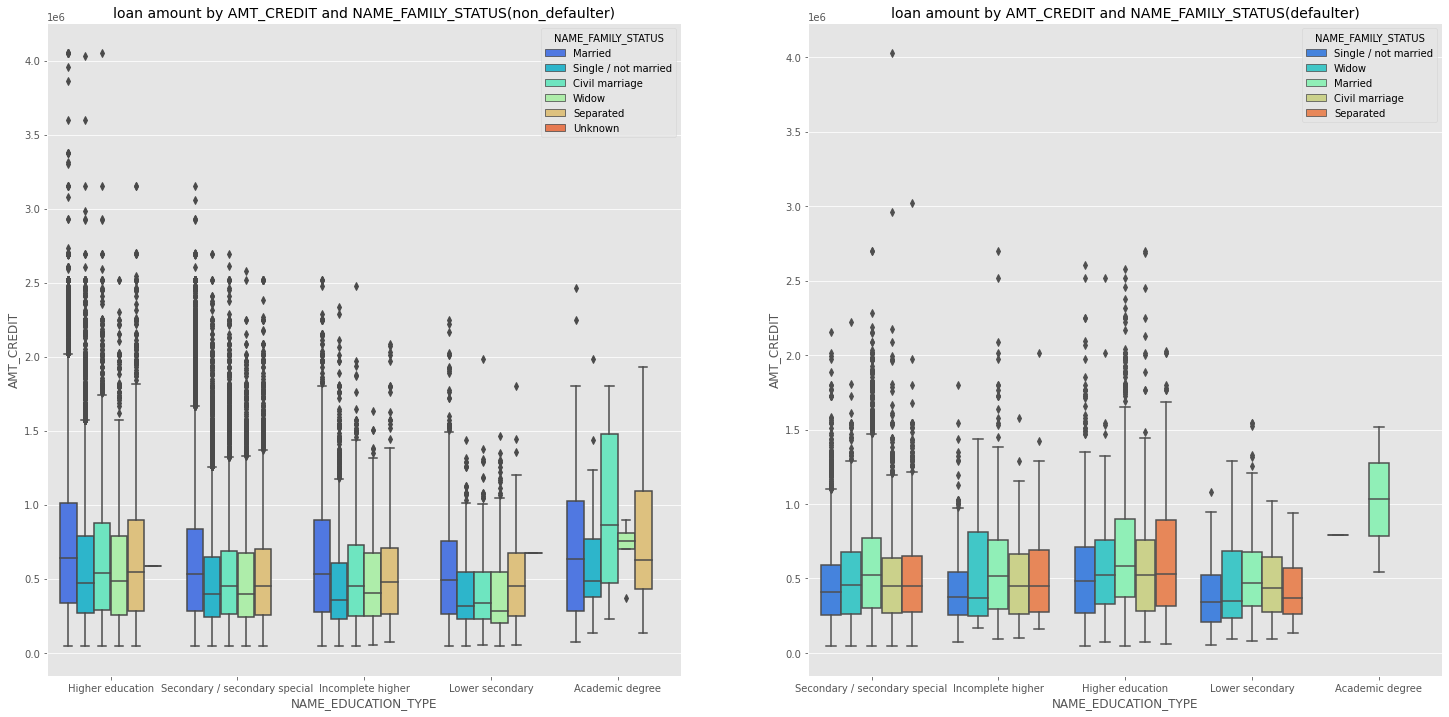

In [185]:
multivariate("NAME_EDUCATION_TYPE", "AMT_CREDIT","NAME_FAMILY_STATUS")

Insights-
* Higher the education, lesser is the likelihood of a loan default
* Among different family status, married ones have the highest likelihood of loan default

### 6.Drilldown Analysis
Here we'll look for % defaulters within different classes in a particular variable.

In [186]:
ad[["AMT_INCOME_RANGE","TARGET"]].groupby(by=["AMT_INCOME_RANGE"]).count().sort_values(by=["TARGET"],ascending=False)

,TARGET
AMT_INCOME_RANGE,
MEDIUM,106633
LOW,90089
VERY_LOW,63671
HIGH,33083
VERY_HIGH,14035


In [187]:
total=ad[["AMT_INCOME_RANGE","TARGET"]].groupby(by=["AMT_INCOME_RANGE"]).count()
defaulter1=defaulter[["AMT_INCOME_RANGE","TARGET"]].groupby(by=["AMT_INCOME_RANGE"]).count()

In [188]:
total

,TARGET
AMT_INCOME_RANGE,
VERY_LOW,63671
LOW,90089
MEDIUM,106633
HIGH,33083
VERY_HIGH,14035


In [189]:
total.index

CategoricalIndex(['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH'], categories=['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY_HIGH'], ordered=True, dtype='category', name='AMT_INCOME_RANGE')

In [190]:
total.TARGET

AMT_INCOME_RANGE
VERY_LOW      63671
LOW           90089
MEDIUM       106633
HIGH          33083
VERY_HIGH     14035
Name: TARGET, dtype: int64

In [191]:
defaulter1

,TARGET
AMT_INCOME_RANGE,
VERY_LOW,5225
LOW,7755
MEDIUM,8773
HIGH,2256
VERY_HIGH,816


#### Defining function for drilldown analysis

In [192]:
def perc_defaulters(col):
    plt.figure(figsize=(25,8))
    total=ad[[col,"TARGET"]].groupby(by=[col]).count()
    defaulter1=defaulter[[col,"TARGET"]].groupby(by=[col]).count()
    perc=defaulter1*100/total
    plt.subplot(1,2,1)
    sns.barplot(x=total.index,y=total.TARGET,color="blue",order=total.sort_values(by=["TARGET"],ascending=False).index)
    plt.title("Application count by " + str(col))
    plt.xticks(rotation =45)
    plt.subplot(1,2,2)
    sns.barplot(x=perc.index,y=perc.TARGET,color="Red",order=perc.sort_values(by=["TARGET"],ascending=False).index)
    plt.title("default % by " + str(col))
    plt.xticks(rotation =45)
    plt.show()

#### a.Drilldown analysis of AMT_INCOME_RANGE


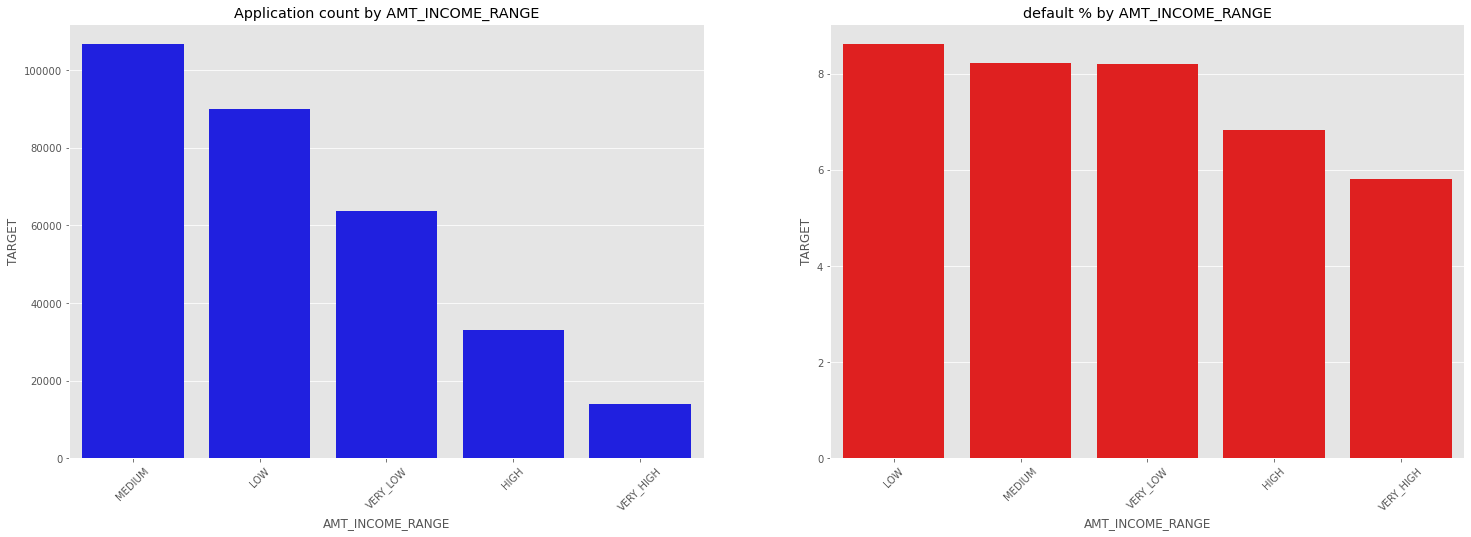

In [193]:
perc_defaulters("AMT_INCOME_RANGE")

Insights-
* Median income range professionals have maximum applications in the data
* Low Income range have maximum % of loan defaults
* As the Income range increases, loan default probability decreases

#### b.Drilldown analysis of NAME_INCOME_TYPE

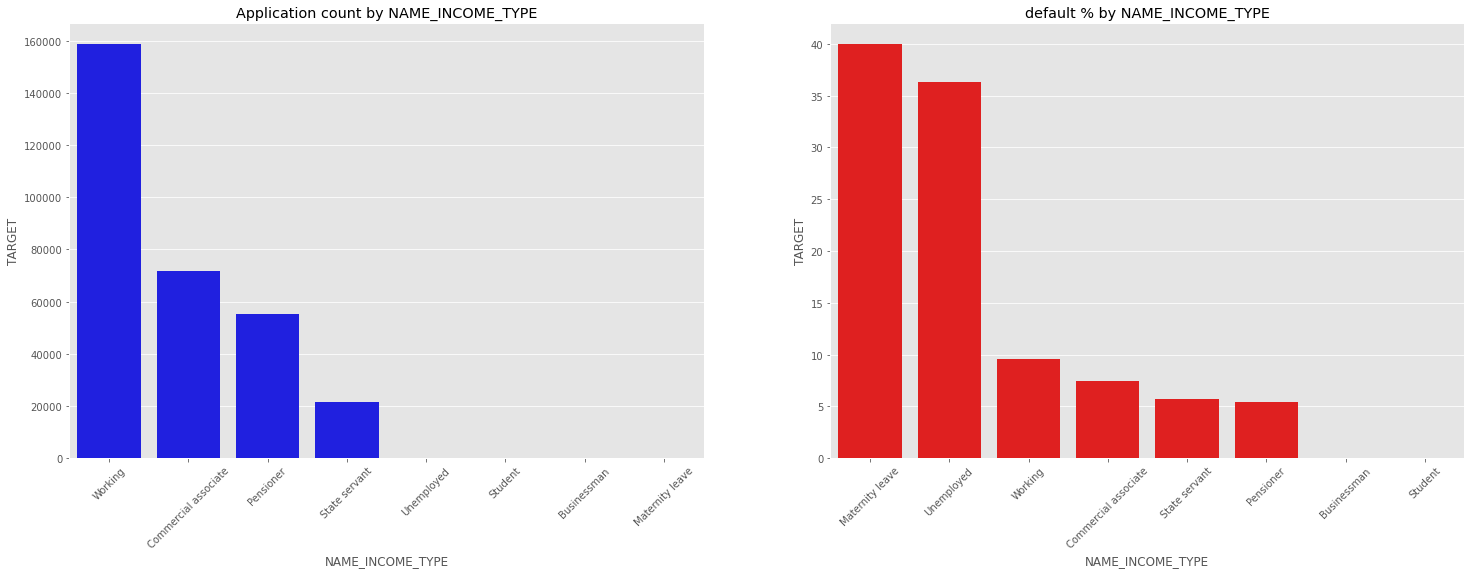

In [194]:
perc_defaulters('NAME_INCOME_TYPE')

Insights-
* Applicants on Maternity leave have a whopping 40% loan default rate
* The second to the list are Unemployed applicants with 35% loan defaults

#### c.Drilldown analysis of NAME_CONTRACT_TYPE

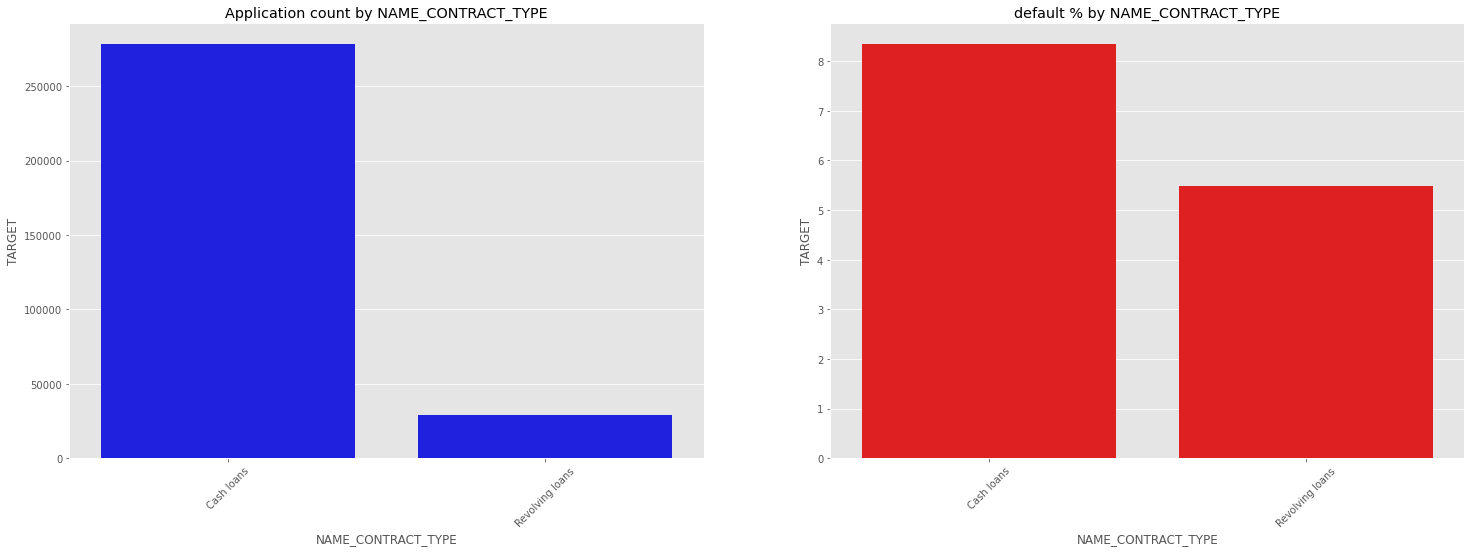

In [195]:
perc_defaulters('NAME_CONTRACT_TYPE')

Insights-
* Majority of the loans are cash loans. Cash loans also have almost double probability of a loan default than revolving loans.

#### d.Drilldown analysis of NAME_EDUCATION_TYPE

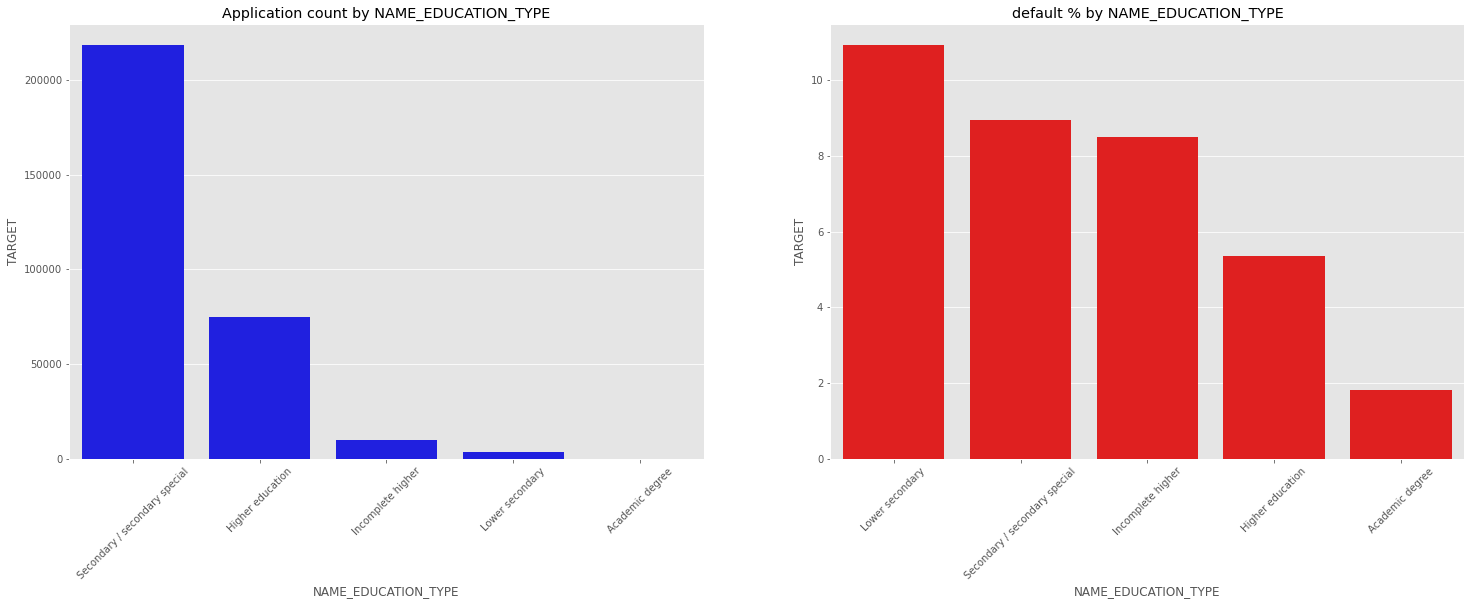

In [196]:
perc_defaulters('NAME_EDUCATION_TYPE')

Insights-
* Higher the education of an applicant, lesser the chance of loan default
* Lower secondary applicants have a concerning 11% loan default rate, but the count of applicants is low 
* The major concern is of Secondary education applicants. They have highest applicants and a significant 9% loan default rate as well.

#### e.Drilldown analysis of OCCUPATION_TYPE

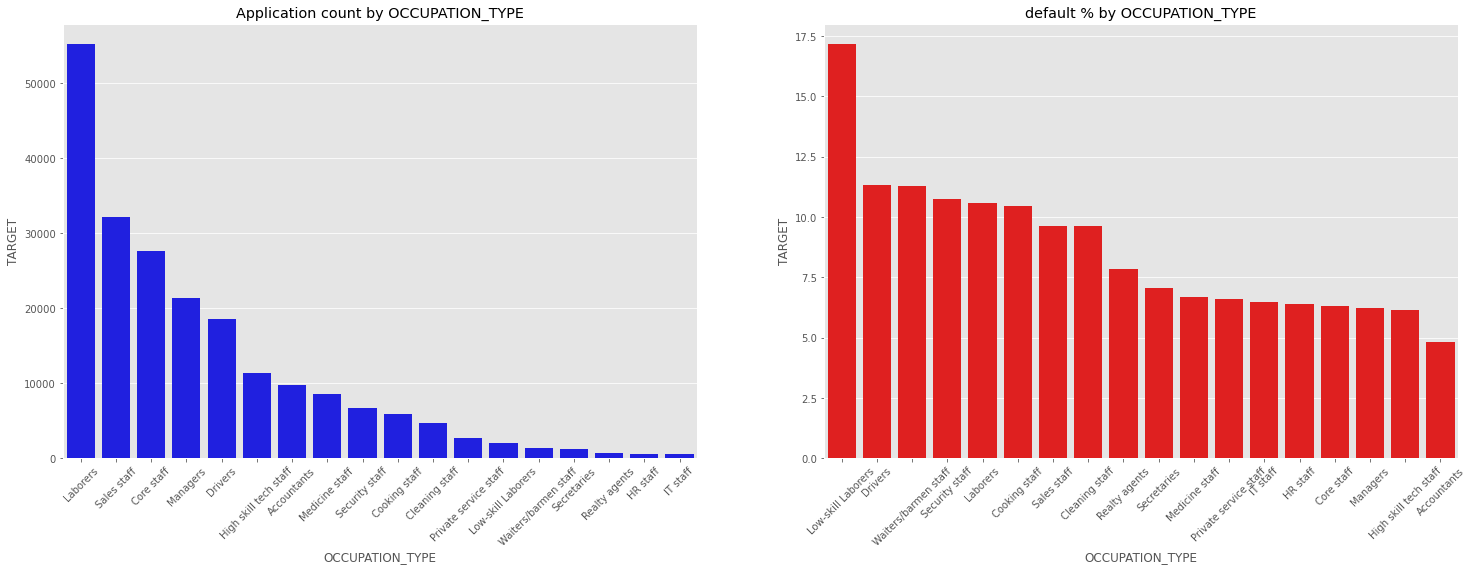

In [197]:
perc_defaulters('OCCUPATION_TYPE')

Insights-
* Low skill labourers  have an alarming 17% loan default rate. The positive here is that they don't have a high applicant count.
* Labourers  & Sales staff will be a major area of concern here, with maximum applicants and a significant loan default rate as well. 
* Drivers also have an alarming combination of counts and default %.

#### 7.Pivot table of all loan default %

In [198]:
perc_defaulters=pd.pivot_table(ad ,values="TARGET", index=[ "CODE_GENDER","AMT_INCOME_RANGE"],
                               columns=["NAME_EDUCATION_TYPE"],aggfunc=np.mean )
perc_defaulters*100

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          5.606793   
            LOW                      0.000000          4.902183   
            MEDIUM                   0.000000          5.025389   
            HIGH                    10.526316          4.151552   
            VERY_HIGH                7.692308          3.728906   
M           VERY_LOW                 0.000000          8.041061   
            LOW                      0.000000          7.330468   
            MEDIUM                   0.000000          7.008598   
            HIGH                     0.000000          5.591114   
            VERY_HIGH                0.000000          4.407996   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   8.639863         8.019324   
            LOW                        8.007537        11.388889   
            MEDIUM                     7.843137         9.698276   
            HIGH                       7.431341         3.896104   
            VERY_HIGH                  8.225108         6.666667   
M           VERY_LOW                  12.396694        12.500000   
            LOW                        9.777778        14.285714   
            MEDIUM                     9.513024        15.051546   
            HIGH                       7.462687         8.163265   
            VERY_HIGH                  7.758621         6.451613   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               7.677801  
            LOW                                    7.952316  
            MEDIUM                                 7.569169  
            HIGH                                   7.073552  
            VERY_HIGH                              6.593002  
M           VERY_LOW                              11.806626  
            LOW                                   12.369265  
            MEDIUM                                11.346642  
            HIGH                                   9.348442  
            VERY_HIGH                              8.993853

Insights - 

Categories with more than 9% default rate - 
* Females, High Income, Academic degree
* Male, Very Low income , Incomplete higher
* Male, Low Income , Incomplete higher
* Male, Medium Income , Incomplete higher
* Female, Low Income, Lower Secondary
* Female, Medium Income, Lower Secondary
* Male, Very Low Income, Lower Secondary
* Male, Low Income, Lower Secondary
* Male, Medium Income, Lower Secondary
* Male, {ALL INCOME RANGES} , Secondary


#### 8.Bivariate Analysis using Pairplot 

In [199]:
pairplor_data = ad[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','TARGET']]

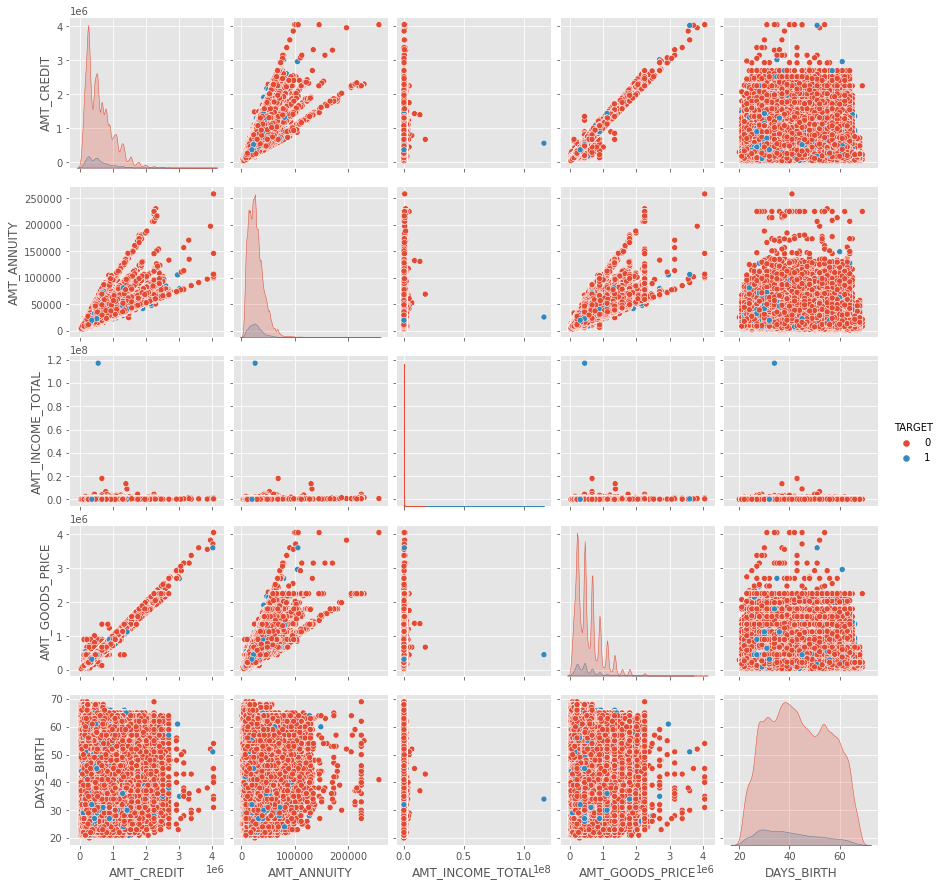

In [200]:
sns.pairplot(pairplor_data,hue="TARGET",diag_kind="kde")
plt.show()

Insights-

* AMT_CREDIT & AMT_GOODS_PRICE are correlated  ( With higher priced goods, loan amount is higher)
* AMT_ANNUITY & AMT_GOODS_PRICE are also correlated ( With higher annuity, expensive goods are purchased)
* AMT_ANNUITY & AMT_CREDIT are correlated (Higher the annuity,higher the loan amount)

With respect to TARGET - 
* Loan defaulters ( Blue ) are younger in age


#### 9.Correlation Check using Heatmap

In [201]:
# Data prep for heatmap
heatmap_data = ad[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]]

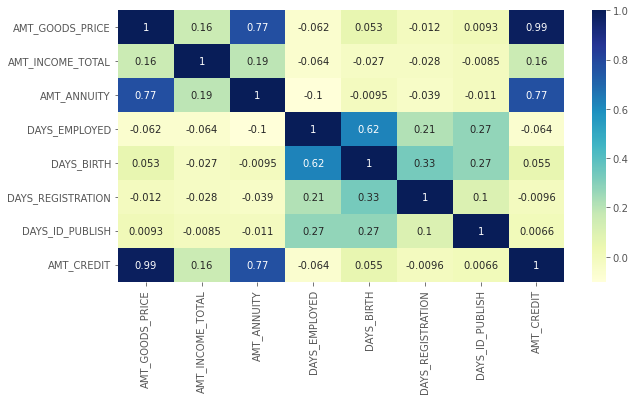

In [202]:
sns.heatmap(heatmap_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

Insights-
* The heatmap confirms our correlation findings from pariplot

### 10.TOP 10 Correlation

In [203]:
corr_matrix=defaulter[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

corr_matrix

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.037591,0.752295,0.006648,0.135532,0.025661,0.056061,0.982783
AMT_INCOME_TOTAL,0.037591,1.000000,0.046421,-0.014977,-0.003154,-0.000158,0.004215,0.038131
AMT_ANNUITY,0.752295,0.046421,1.000000,-0.081207,0.014028,-0.034279,0.016767,0.752195
DAYS_EMPLOYED,0.006648,-0.014977,-0.081207,1.000000,0.582441,0.192455,0.229090,0.001930
DAYS_BIRTH,0.135532,-0.003154,0.014028,0.582441,1.000000,0.289116,0.252256,0.135070
DAYS_REGISTRATION,0.025661,-0.000158,-0.034279,0.192455,0.289116,1.000000,0.096833,0.025854
DAYS_ID_PUBLISH,0.056061,0.004215,0.016767,0.229090,0.252256,0.096833,1.000000,0.052329
AMT_CREDIT,0.982783,0.038131,0.752195,0.001930,0.135070,0.025854,0.052329,1.000000


In [204]:
np.ones(corr_matrix.shape)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [205]:
# traingle lower - tril
np.tril(np.ones(corr_matrix.shape),k=1)

array([[1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [206]:
# traingle upper - triu
np.triu(np.ones(corr_matrix.shape),k=1)

array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [207]:
corr_matrix=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
corr_matrix

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,NaN,0.037591,0.752295,0.006648,0.135532,0.025661,0.056061,0.982783
AMT_INCOME_TOTAL,NaN,NaN,0.046421,-0.014977,-0.003154,-0.000158,0.004215,0.038131
AMT_ANNUITY,NaN,NaN,NaN,-0.081207,0.014028,-0.034279,0.016767,0.752195
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,0.582441,0.192455,0.229090,0.001930
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,0.289116,0.252256,0.135070
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,0.096833,0.025854
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052329
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
corr_matrix.unstack()

AMT_GOODS_PRICE    AMT_GOODS_PRICE           NaN
                   AMT_INCOME_TOTAL          NaN
                   AMT_ANNUITY               NaN
                   DAYS_EMPLOYED             NaN
                   DAYS_BIRTH                NaN
                   DAYS_REGISTRATION         NaN
                   DAYS_ID_PUBLISH           NaN
                   AMT_CREDIT                NaN
AMT_INCOME_TOTAL   AMT_GOODS_PRICE      0.037591
                   AMT_INCOME_TOTAL          NaN
                   AMT_ANNUITY               NaN
                   DAYS_EMPLOYED             NaN
                   DAYS_BIRTH                NaN
                   DAYS_REGISTRATION         NaN
                   DAYS_ID_PUBLISH           NaN
                   AMT_CREDIT                NaN
AMT_ANNUITY        AMT_GOODS_PRICE      0.752295
                   AMT_INCOME_TOTAL     0.046421
                   AMT_ANNUITY               NaN
                   DAYS_EMPLOYED             NaN
                   D

In [209]:
corr_matrix_df=corr_matrix.unstack().reset_index()
corr_matrix_df

,level_0,level_1,0
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,NaN
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NaN
2,AMT_GOODS_PRICE,AMT_ANNUITY,NaN
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,NaN
4,AMT_GOODS_PRICE,DAYS_BIRTH,NaN
5,AMT_GOODS_PRICE,DAYS_REGISTRATION,NaN
6,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,NaN
7,AMT_GOODS_PRICE,AMT_CREDIT,NaN
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.037591
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN


In [210]:
corr_matrix_df.columns=["var1","var2","Corr"]
corr_matrix_df

,var1,var2,Corr
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,NaN
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NaN
2,AMT_GOODS_PRICE,AMT_ANNUITY,NaN
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,NaN
4,AMT_GOODS_PRICE,DAYS_BIRTH,NaN
5,AMT_GOODS_PRICE,DAYS_REGISTRATION,NaN
6,AMT_GOODS_PRICE,DAYS_ID_PUBLISH,NaN
7,AMT_GOODS_PRICE,AMT_CREDIT,NaN
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.037591
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN


In [211]:
corr_matrix_df.dropna(subset=["Corr"],inplace=True)

In [212]:
corr_matrix_df

,var1,var2,Corr
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.037591
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
24,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.006648
25,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.014977
26,DAYS_EMPLOYED,AMT_ANNUITY,-0.081207
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135532
33,DAYS_BIRTH,AMT_INCOME_TOTAL,-0.003154
34,DAYS_BIRTH,AMT_ANNUITY,0.014028
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441


In [213]:
corr_matrix_df["Abs_Corr"] = abs(corr_matrix_df["Corr"])
corr_matrix_df

,var1,var2,Corr,Abs_Corr
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.037591,0.037591
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295,0.752295
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421,0.046421
24,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.006648,0.006648
25,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.014977,0.014977
26,DAYS_EMPLOYED,AMT_ANNUITY,-0.081207,0.081207
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135532,0.135532
33,DAYS_BIRTH,AMT_INCOME_TOTAL,-0.003154,0.003154
34,DAYS_BIRTH,AMT_ANNUITY,0.014028,0.014028
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441


In [214]:
Top10_corr=corr_matrix_df.sort_values(by=["Abs_Corr"],ascending=False).head(10)
Top10_corr

,var1,var2,Corr,Abs_Corr
56,AMT_CREDIT,AMT_GOODS_PRICE,0.982783,0.982783
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295,0.752295
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252256,0.252256
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
43,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
32,DAYS_BIRTH,AMT_GOODS_PRICE,0.135532,0.135532
60,AMT_CREDIT,DAYS_BIRTH,0.135070,0.135070


#  Final Insights 

Following are the driving factors for a loan default - 

* Lower the highest education of an applicant, higher the chance of loan default. 
This is one of the core driving factor in loan defaults.

* Labourers & Sales staff are major area of concern , with maximum applicants and a significant loan default rate. Drivers also have an alarming combination of counts and default %.

* Applicants on Maternity leave have a whopping 40% loan default rate. Unemployed applicants also have 35% loan defaults

* Low Income range have maximum % of loan defaults. As the Income range increases, loan default probability decreases

* Among different family status, married ones have the highest likelihood of loan default

* Applicants with lower Annuity Amount are slightly more likely to default on a loan.

* Young applicants are more expected to default on a loan.

* More Men deafault loans as compared to Women


>>                                 THE END  